In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/loan_train.csv")
df.head()

,1,Name,Age,Income($)
0,2,Rob,27,70000
1,3,Michael,29,90000
2,4,Mohan,29,61000
3,5,Ismail,28,60000
4,6,Kory,42,150000


Text(0, 0.5, 'Income($)')

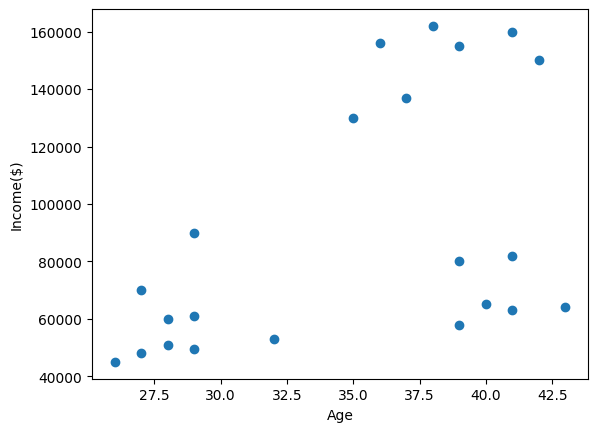

In [7]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['cluster']=y_predicted
df.head()

,1,Name,Age,Income($),cluster
0,2,Rob,27,70000,2
1,3,Michael,29,90000,2
2,4,Mohan,29,61000,0
3,5,Ismail,28,60000,0
4,6,Kory,42,150000,1


In [10]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

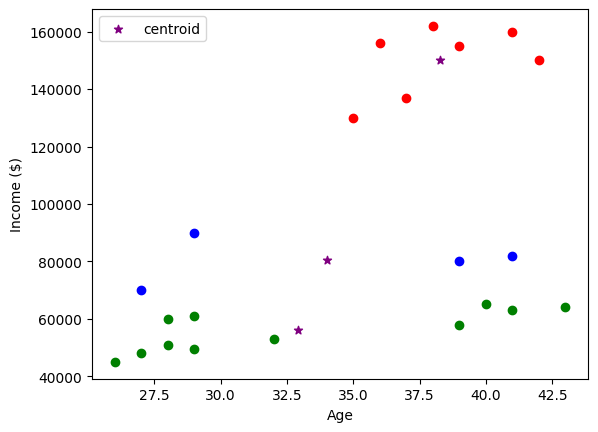

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [12]:
#Preprocessing using min max scaler

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [15]:
df.head()

,1,Name,Age,Income($),cluster
0,2,Rob,0.058824,0.213675,2
1,3,Michael,0.176471,0.384615,2
2,4,Mohan,0.176471,0.136752,0
3,5,Ismail,0.117647,0.128205,0
4,6,Kory,0.941176,0.897436,1


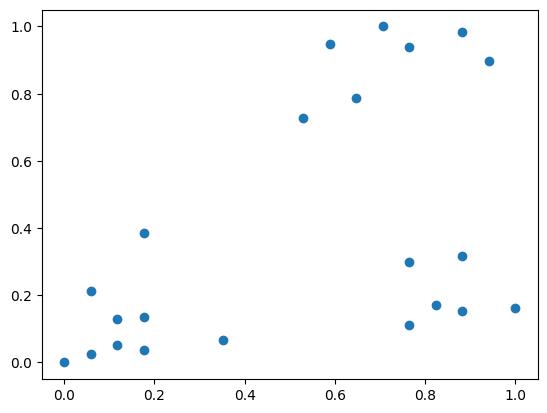

In [16]:
plt.scatter(df.Age,df['Income($)'])

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster']=y_predicted
df.head()

,1,Name,Age,Income($),cluster
0,2,Rob,0.058824,0.213675,1
1,3,Michael,0.176471,0.384615,1
2,4,Mohan,0.176471,0.136752,1
3,5,Ismail,0.117647,0.128205,1
4,6,Kory,0.941176,0.897436,0


In [19]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

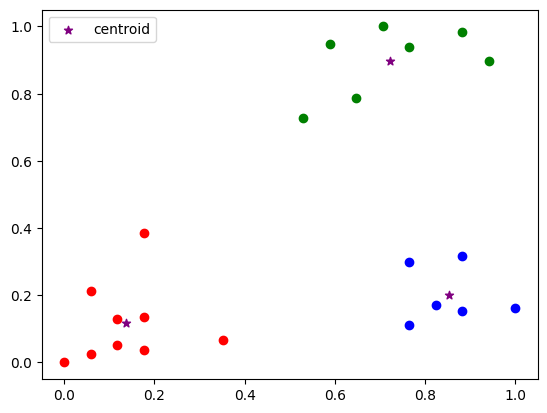

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [21]:
#Elbow Plot

In [22]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

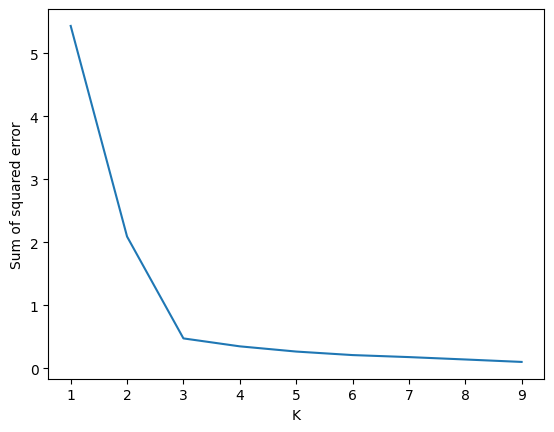

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)